In [ ]:
pip install streamlit

In [17]:
import streamlit as st
import pandas as pd

### Data Preparation
1. Replace missing values with 0
2. Create a 'Winter' identifier (e.g. 2023-2024) 
3. Create an 'inches' column from the existing 'centimeter' column 

In [76]:
df = pd.read_csv("data/hermit_lake_snowdepth.csv")

# fill missing values with NA
df = df.fillna(0) # replace missing values with 0

# extract day, month, and year from date
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['month_day'] = df['month'].astype(str) + '-' + df['day'].astype(str)

# ascertain winter 
# if month is october-december generate '{year}-{year+1}'
# if month is january-june generate '{year-1}-{year}'

def get_winter(X):
    winter_list = []
    
    # loop over all rows in dataframe
    for index, row in X.iterrows():     
        
        # if month is july - december
        if row['month'] > 6:
            winter_list.append(str(row['year']) + '-' + str(row['year']+1))
        
        # if month is january - june
        else:
            winter_list.append(str(row['year']-1) + '-' + str(row['year']))

    return winter_list
    
df['winter'] = get_winter(df)

df.to_csv("data/cleaned_hermit_lake_snowdepth.csv")

### Generate historical averages

In [77]:
historical_averages = df.groupby('month_day')['depth_cm'].mean().reset_index()
historical_averages['date'] = pd.to_datetime(historical_averages['month_day'] + '-2024')
historical_averages = historical_averages.sort_values(['date'])

historical_averages.to_csv("data/historical_averages.csv")

In [74]:
historical_averages

,month_day,depth_cm,date
0,1-1,72.833333,2024-01-01
11,1-2,80.333333,2024-01-02
22,1-3,82.666667,2024-01-03
25,1-4,77.333333,2024-01-04
26,1-5,81.000000,2024-01-05
...,...,...,...
80,12-27,76.400000,2024-12-27
81,12-28,71.800000,2024-12-28
82,12-29,67.800000,2024-12-29
84,12-30,74.600000,2024-12-30


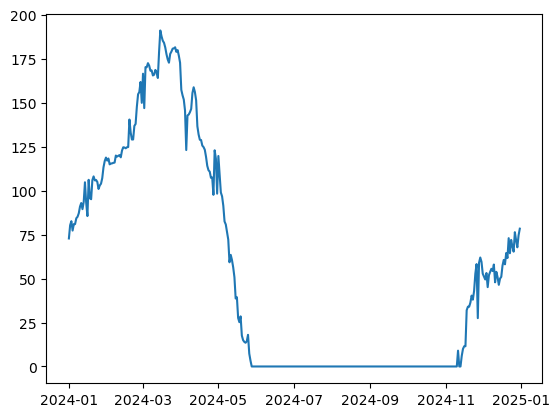

In [68]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

plt.plot(historical_averages.date,historical_averages.depth_cm)
plt.show()

In [75]:
# Display the DataFrame
st.write("Snow Depth Data:")
st.dataframe(df)

# Plot the line chart
st.write("Snow Depth Over Time:")
st.line_chart(df.set_index('date')['depth_cm'])

/Users/daniel/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/daniel/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


DeltaGenerator()

In [ ]:
st.title('Historical Average Snow Depth - Mt. Washington')
